## CodeCarbon
Python追蹤碳排lib，以公斤二氧化碳當量 (CO₂eq) 為單位，從而估算其工作的碳足跡，碳排放量以每千瓦時二氧化碳當量公斤數來衡量
- [github](https://github.com/mlco2/codecarbon)
- [doc](https://mlco2.github.io/codecarbon/)
- [dashboard](https://dashboard.codecarbon.io/)

### CodeCarbon的使命：
- 讓開發者意識到代碼的環境影響
- 提供精確的碳排放測量工具
- 促進綠色軟體開發實踐

### 核心功能
- 🔍 精確測量：追蹤 CPU、GPU、RAM 的能耗
- 🌍 地理感知：根據不同地區電網碳強度計算
- 📊 詳細報告：生成詳細的碳排放報告

### 安裝CodeCarbon
- https://mlco2.github.io/codecarbon/installation.html

In [ ]:
pip install codecarbon

### 基本使用方法

#### 兩種模式
- [online](https://mlco2.github.io/codecarbon/usage.html#online-mode): 可以存取Internet
  - EmissionsTracker
  - track_emissions decorator
- [offline](https://mlco2.github.io/codecarbon/usage.html#offline-mode): 無法存取Internet
  - OfflineEmissionsTracker

#### 使用EmissionsTracker追蹤碳排
- 基本必設參數:
```
project_name: 項目識別
experiment_name: 實驗區分
output_dir: 結果輸出位置
```
- 地理位置參數:
```
country_iso_code: 影響碳強度計算(offline)
cloud_provider + cloud_region: 雲端環境專用
```
- 測量精度參數:
```
measure_power_secs: 測量頻率（1-300秒）
tracking_mode: "machine" vs "process"
```
- 輸出控制參數:
```
save_to_file: 本地文件保存
save_to_api: 雲端服務同步
log_level: 日誌詳細程度
```

In [ ]:
def manual_control_example():
    """手動控制追蹤開始和結束"""

    tracker = EmissionsTracker(
        project_name="manual_tracking",
        output_file="manual_emissions.csv"
    )

    # 開始追蹤
    tracker.start()

    # 執行耗能計算
    import time
    time.sleep(2)  # 模擬計算過程
    result = [i**3 for i in range(100000)]

    # 停止追蹤並獲取結果
    emissions: float = tracker.stop()
    print(f"手動追蹤碳排放: {emissions} kg CO2eq")
    print(f"\n您的程式碼執行產生的碳排放量約為: {emissions:.6f} 公斤 CO2e")

manual_control_example()

### CodeCarbon dashboard
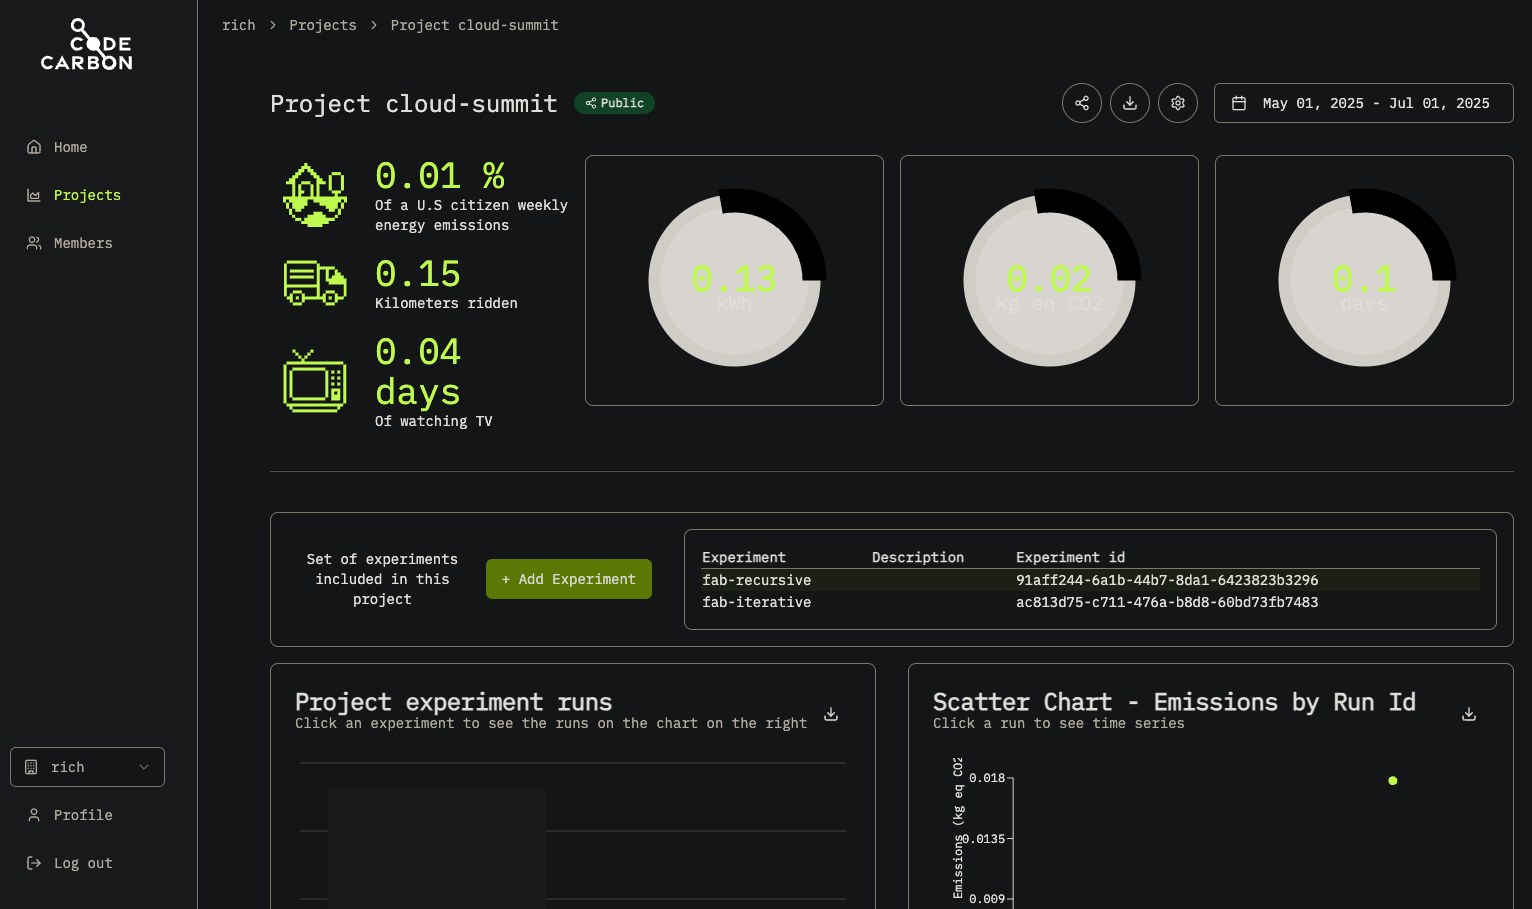
- [註冊帳號](https://colab.research.google.com/drive/11rG0B5oJDmfcLa74cxVQ1RedVQAz01ti#scrollTo=tB7yqIueo7nD&line=3&uniqifier=1)
- 建立Project, Token, Experiment

In [ ]:
from google.colab import userdata
API_KEY = userdata.get('API-KEY')
print(f"API KEY: {API_KEY}")

### 演算法優化案例-費氏數列(Fibonacci sequence)
The most straightforward way to implement Fibonacci is using recursion, directly following its definition: F(n)=F(n-1)+F(n−2).
- Pros:
Simple and readable: Directly translates the mathematical definition.
- Cons:
Inefficient: It recalculates the same Fibonacci numbers multiple times, leading to exponential time complexity (O(2 n)). This makes it very slow for larger values of n.

In [27]:
# case1 使用遞迴
def fibonacci_recursive(n):
    if n <= 0:
        return 0
    elif n == 1:
        return 1
    else:
        return fibonacci_recursive(n - 1) + fibonacci_recursive(n - 2)

In [40]:
from codecarbon import EmissionsTracker

tracker = EmissionsTracker(
    project_name="cloud-summit",
    output_dir="./",
    measure_power_secs=10,
    api_key=API_KEY,
    experiment_id="91aff244-6a1b-44b7-8da1-6423823b3296",
    save_to_api=True)


fn_length = 40

tracker.start()
result = fibonacci_recursive(fn_length)
print(f"1st Fibonacci (recursive) of {fn_length}: {result}")

result = fibonacci_recursive(10)
print(f"2nd Fibonacci (recursive) of {fn_length}: {result}")

# 停止追蹤並獲取結果
emissions: float = tracker.stop()
print(f"\n您的程式碼執行產生的碳排放量約為: {emissions:.10f} 公斤 CO2e")
print("詳細報告已儲存到 ./emissions.csv")

[codecarbon WARNING @ 06:57:14] Multiple instances of codecarbon are allowed to run at the same time.
[codecarbon INFO @ 06:57:14] [setup] RAM Tracking...
[codecarbon INFO @ 06:57:14] [setup] CPU Tracking...
[codecarbon WARNING @ 06:57:15] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon WARNING @ 06:57:15] No CPU tracking mode found. Falling back on estimation based on TDP for CPU. 
 Linux OS detected: Please ensure RAPL files exist at /sys/class/powercap/intel-rapl/subsystem to measure CPU

[codecarbon INFO @ 06:57:15] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon WARNING @ 06:57:15] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon INFO @ 06:57:15] [setup] GPU Tracking...
[codecarbon INFO @ 06:57:15] No GPU found.
[codecarbon INFO @ 06:57:15] The below tracking methods have been set up:
                RAM Tracking Method: RAM power estimation model
               

1st Fibonacci (recursive) of 40: 102334155
2nd Fibonacci (recursive) of 40: 55

您的程式碼執行產生的碳排放量約為: 0.0000523847 公斤 CO2e
詳細報告已儲存到 ./emissions.csv


In [8]:
tracker2 = EmissionsTracker(
    project_name="cloud-summit",
    output_dir="./",
    measure_power_secs=10,
    api_key=API_KEY,
    experiment_id="ac813d75-c711-476a-b8d8-60bd73fb7483",
    save_to_api=True)

[codecarbon WARNING @ 03:10:11] Multiple instances of codecarbon are allowed to run at the same time.
[codecarbon INFO @ 03:10:11] [setup] RAM Tracking...
[codecarbon INFO @ 03:10:11] [setup] CPU Tracking...
[codecarbon WARNING @ 03:10:13] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon WARNING @ 03:10:13] No CPU tracking mode found. Falling back on estimation based on TDP for CPU. 
 Linux OS detected: Please ensure RAPL files exist at /sys/class/powercap/intel-rapl/subsystem to measure CPU

[codecarbon INFO @ 03:10:13] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon WARNING @ 03:10:13] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon INFO @ 03:10:13] [setup] GPU Tracking...
[codecarbon INFO @ 03:10:13] No GPU found.
[codecarbon INFO @ 03:10:13] The below tracking methods have been set up:
                RAM Tracking Method: RAM power estimation model
               

In [ ]:
# case2 使用疊代iterative
def fibonacci_iterative(n):
    a, b = 0, 1  # 初始化前兩個費氏數
    for i in range(n):
        a, b = b, a + b  # 從第三個數字開始計算到第 n 個
    return a

In [38]:
tracker2.start()
result = fibonacci_iterative(fn_length)
print(f"1st Fibonacci (iterative) of {fn_length}: {result}")

result = fibonacci_iterative(fn_length)
print(f"2nd Fibonacci (iterative) of {fn_length}: {result}")
# 停止追蹤並獲取結果
emissions2: float = tracker2.stop()

print(f"\n您的程式碼執行產生的碳排放量約為: {emissions:.10f} 公斤 CO2e")

[codecarbon WARNING @ 06:33:27] Already started tracking
[codecarbon WARNING @ 06:33:27] Tracker already stopped !
[codecarbon WARNING @ 06:33:27] Background scheduler didn't run for a long period (75s), results might be inaccurate
[codecarbon INFO @ 06:33:27] Energy consumed for RAM : 0.033854 kWh. RAM Power : 10.0 W
[codecarbon INFO @ 06:33:27] Delta energy consumed for CPU with constant : 0.000893 kWh, power : 42.5 W
[codecarbon INFO @ 06:33:27] Energy consumed for All CPU : 0.143880 kWh
[codecarbon INFO @ 06:33:27] 0.177734 kWh of electricity used since the beginning.
[codecarbon INFO @ 06:33:27] 0.002023 g.CO2eq/s mean an estimation of 63.80860701261737 kg.CO2eq/year


1st Fibonacci (iterative) of 40: 102334155
2nd Fibonacci (iterative) of 40: 102334155


[codecarbon WARNING @ 06:33:27] ApiClient : emissions not sent because of a duration smaller than 1.



您的程式碼執行產生的碳排放量約為: 0.0000513712 公斤 CO2e
